In [1]:
# imports
import numpy as np
import tifffile as tif
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

In [2]:
folder_of_tiffs = '/Users/emilydennis/Desktop/spimout/'
list_of_tiffs = [file for file in os.listdir(folder_of_tiffs) if file[-4:]=='.tif']

In [3]:
max_indices = []
max_in_atl = []
max_in_reg = []
for file in list_of_tiffs:
    print(file)
    tiff_file = tif.imread(os.path.join(folder_of_tiffs,file))
    index_tuple = np.unravel_index(np.argmax(tiff_file),tiff_file.shape)
    max_indices.append([file,index_tuple])
    if 'atl' in file:
        max_in_atl.append([file,index_tuple])
    else:
        max_in_reg.append([file,index_tuple])

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(max_indices,columns=['file_name','indices']).to_csv('/Users/emilydennis/Desktop/cm2_max_indices.csv')

In [ ]:
max_in_atl_df = pd.DataFrame(max_in_atl,columns=["name","tuple"])
max_in_reg_df = pd.DataFrame(max_in_reg,columns=["name","tuple"])

In [4]:
max_indices_df = pd.read_csv('/Users/emilydennis/Desktop/cm2_max_indices.csv')

In [7]:
max_indices_df=max_indices_df.drop(columns=['Unnamed: 0'])

In [38]:
max_in_atl_df = max_indices_df[max_indices_df.file_name.str.contains('atl.tif')]
max_in_reg_df = max_indices_df[max_indices_df.file_name.str.contains('to_reg')]

In [56]:
j316=tif.imread('/Users/emilydennis/Desktop/spimout/j316_reg_in_atl.tif')

In [80]:
np.where(j316==1379)[1][0]

741

In [81]:
for i in np.sort(np.ravel(j316))[-40:]:
    print('i is {} and tuple {}'.format(i,np.where(j316==i)))

i is 1379 and tuple (array([127]), array([741]), array([212]))
i is 1384 and tuple (array([412]), array([565]), array([13]))
i is 1397 and tuple (array([381]), array([578]), array([27]))
i is 1418 and tuple (array([321]), array([1045]), array([149]))
i is 1423 and tuple (array([128]), array([741]), array([212]))
i is 1435 and tuple (array([410]), array([569]), array([13]))
i is 1436 and tuple (array([411]), array([567]), array([14]))
i is 1445 and tuple (array([409]), array([565]), array([16]))
i is 1453 and tuple (array([410]), array([565]), array([15]))
i is 1463 and tuple (array([409, 412]), array([570, 567]), array([14, 13]))
i is 1463 and tuple (array([409, 412]), array([570, 567]), array([14, 13]))
i is 1468 and tuple (array([411]), array([566]), array([14]))
i is 1482 and tuple (array([410]), array([567]), array([13]))
i is 1490 and tuple (array([410]), array([568]), array([14]))
i is 1491 and tuple (array([410]), array([566]), array([14]))
i is 1514 and tuple (array([322]), arr

In [85]:
max_in_atl_df.indices[7] = '(381, 578, 27)'
max_in_atl_df

/opt/anaconda3/envs/ls2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,file_name,indices
0,e143_reg_in_atl.tif,"(365, 541, 40)"
2,e144_reg_in_atl.tif,"(385, 533, 41)"
4,e142_reg_in_atl.tif,"(367, 551, 22)"
5,e153_reg_in_atl.tif,"(378, 710, 64)"
6,h234_in_atl.tif,"(366, 527, 23)"
7,j316_reg_in_atl.tif,"(381, 578, 27)"
8,j319_reg_in_atl.tif,"(370, 579, 46)"
13,j317_reg_in_atl.tif,"(387, 580, 58)"


(0.0, 1150.0)

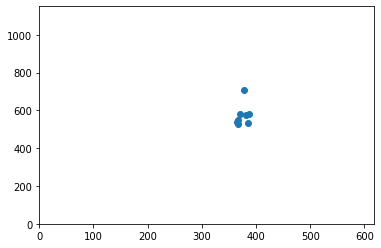

In [87]:
xs=[]
ys=[]
for locale in max_in_atl_df.indices:
    xs.append(eval(locale)[1])
    ys.append(eval(locale)[0])
plt.scatter(ys,xs)
plt.xlim([0,618])
plt.ylim([0,1150])
# from here, need to check j316_reg_in_atl -- manually 'fixed' j316_reg_in_atl
# e153_reg_in_atl had bad alignment! re-align (cerebellum stretched weird?)

In [88]:
max_in_reg_df.indices[9]='(103,701,339)'
max_in_reg_df.indices[10]='(85,568,394)'

/opt/anaconda3/envs/ls2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [95]:
max_in_reg_df
# pull down from spock reg:atl transform files
# for each filename, get base

,file_name,indices
1,h234_cell_to_reg.tif,"(141, 627, 393)"
3,a253_cell_to_reg.tif,"(148, 629, 333)"
9,e144_cell_to_reg.tif,"(103,701,339)"
10,e143_cell_to_reg.tif,"(85,568,394)"
11,j319_cell_to_reg.tif,"(130, 732, 372)"
12,j316_cell_to_reg.tif,"(126, 707, 335)"
14,e142_cell_to_reg.tif,"(133, 694, 355)"
15,j317_cell_to_reg.tif,"(106, 762, 331)"
16,e153_cell_to_reg.tif,"(133, 664, 329)"


(0.0, 539.0)

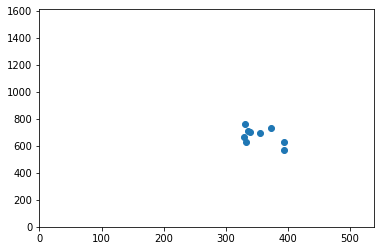

In [94]:


xs=[]
ys=[]
for locale in max_in_reg_df.indices:
    xs.append(eval(locale)[1])
    ys.append(eval(locale)[2])
plt.scatter(ys,xs)

# from here need to manually check e144_cell_to_reg and e143_cell_to_reg
# manual check revealed both blown out, skewing max vals

In [110]:
max_in_reg_df.insert(2,'adj_z',0)
max_in_reg_df.insert(3,'adj_y',0)
max_in_reg_df.insert(4,'adj_x',0)

In [114]:
max_in_reg_df=max_in_reg_df.reset_index()

In [2]:
import SimpleITK as sitk
# for each element of max_in_reg_df get the indices
# get the transform files in spimout/h234 for ex
# transform points
# save in new columns

In [117]:
i=0
# for loop starts here
indices = eval(max_in_reg_df.indices[i])


(141, 627, 393)

In [115]:
max_in_reg_df

,index,file_name,indices,adj_z,adj_y,adj_x
0,1,h234_cell_to_reg.tif,"(141, 627, 393)",0,0,0
1,3,a253_cell_to_reg.tif,"(148, 629, 333)",0,0,0
2,9,e144_cell_to_reg.tif,"(103,701,339)",0,0,0
3,10,e143_cell_to_reg.tif,"(85,568,394)",0,0,0
4,11,j319_cell_to_reg.tif,"(130, 732, 372)",0,0,0
5,12,j316_cell_to_reg.tif,"(126, 707, 335)",0,0,0
6,14,e142_cell_to_reg.tif,"(133, 694, 355)",0,0,0
7,15,j317_cell_to_reg.tif,"(106, 762, 331)",0,0,0
8,16,e153_cell_to_reg.tif,"(133, 664, 329)",0,0,0


In [3]:
sitk.ReadParameterFile('/Users/emilydennis/Desktop/spimout/a253/TransformParameters.0.txt')

<SimpleITK.SimpleITK.ParameterMap; proxy of <Swig Object of type 'std::map< std::string,std::vector< std::string,std::allocator< std::string > >,std::less< std::string >,std::allocator< std::pair< std::string const,std::vector< std::string,std::allocator< std::string > > > > > *' at 0x7f979eb29270> >

In [6]:
commonbase = '/Users/emilydennis/Desktop/spimout/a253'
parameterMap0 = sitk.ReadParameterFile(os.path.join(commonbase,'TransformParameters.0.txt'))
parameterMap1 = sitk.ReadParameterFile(os.path.join(commonbase,'TransformParameters.1.txt'))
parameterMap2 = sitk.ReadParameterFile(os.path.join(commonbase,'TransformParameters.2.txt'))
parameterMap3 = sitk.ReadParameterFile(os.path.join(commonbase,'TransformParameters.3.txt'))


transformixImageFilter.SetParameterMap(parameterMap0)
transformixImageFilter.AddParameterMap(parameterMap1)
transformixImageFilter.AddParameterMap(parameterMap2)
transformixImageFilter.AddParameterMap(parameterMap3)

AttributeError: 'TransformixImageFilter' object has no attribute 'SetParameterMap'

In [5]:
transformixImageFilter = sitk.TransformixImageFilter()

In [10]:
transformixImageFilter.AddTransformParameterMap(parameterMap3)

<SimpleITK.SimpleITK.TransformixImageFilter; proxy of <Swig Object of type 'itk::simple::TransformixImageFilter::Self *' at 0x7f978d02eea0> >

In [11]:
fx= sitk.ReadImage('image.tif')
mv= sitk.ReadImage('image.tif')
transformixImageFilter.SetFixedPointSetFileName('ptsfile')
transformixImageFilter.Execute()

<SimpleITK.SimpleITK.TransformixImageFilter; proxy of <Swig Object of type 'itk::simple::TransformixImageFilter::Self *' at 0x7f97a6dd8cc0> >